In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
gender_df = pd.read_csv("gender_submission.csv")
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


survival | 	Survival	  |  0 = No, 1 = Yes <br />
pclass	 |  Ticket class  |	1 = 1st, 2 = 2nd, 3 = 3rd

In [4]:
# How many people survived?
print("{} survived.".format(train_df.loc[train_df["Survived"] == 1].shape[0]))
# How many died?
print("{} died".format(train_df.loc[train_df["Survived"] == 0].shape[0]))

342 survived.
549 died


There seem seems to be a range of ages between 10 and 60 that survived the most.

Text(0.5,1,'Number of deaths by Age.')

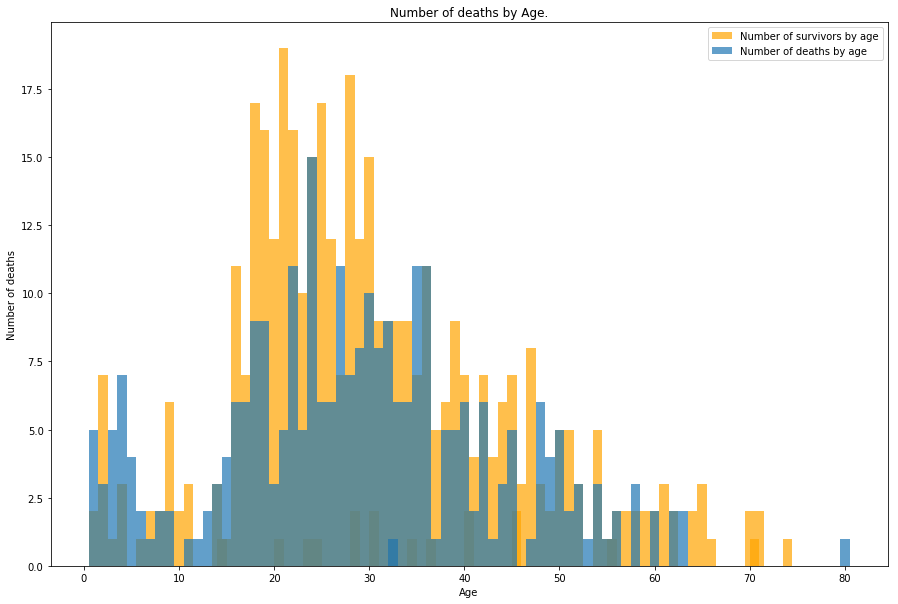

In [5]:
# Number of death by age
# Group by survived by age
# number of peple who survived
age_group_survived_count = train_df.dropna(subset=['Age'], how='all').loc[train_df["Survived"] == 1].sort_values(by=["Age"]).loc[train_df["Age"] >= 1].groupby(["Age"]).count()["Survived"]
age_group_died_count = train_df.dropna(subset=['Age'], how='all').loc[train_df["Survived"] == 0].sort_values(by=["Age"]).loc[train_df["Age"] >= 1].groupby(["Age"]).count()["Survived"]
plt.figure(figsize=(15,10))
plt.bar(age_group_died_count.index, age_group_died_count, color='orange', alpha=0.7, width=1)
plt.bar(age_group_survived_count.index, age_group_survived_count, alpha=0.7, width=1)
plt.legend(['Number of survivors by age', "Number of deaths by age"])
plt.xlabel("Age")
plt.ylabel("Number of deaths")
plt.title("Number of deaths by Age.")

Text(0,0.5,'Number of survivors')

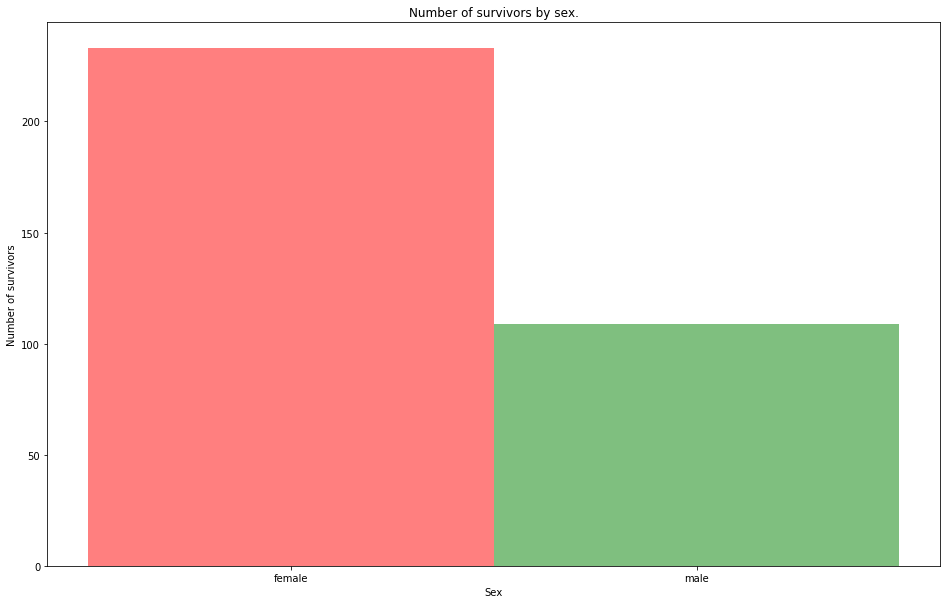

In [6]:
# Number of people who survived by sex
sex_survived = train_df.loc[train_df["Survived"] == 1].groupby("Sex").count()["Survived"]
plt.figure(figsize=(16, 10))
plt.bar(sex_survived.index, sex_survived, color=["red", "green"], alpha=0.5, width=1)
plt.xlabel("Sex")
plt.title("Number of survivors by sex.")
plt.ylabel("Number of survivors")

Text(0,0.5,'Number of deaths.')

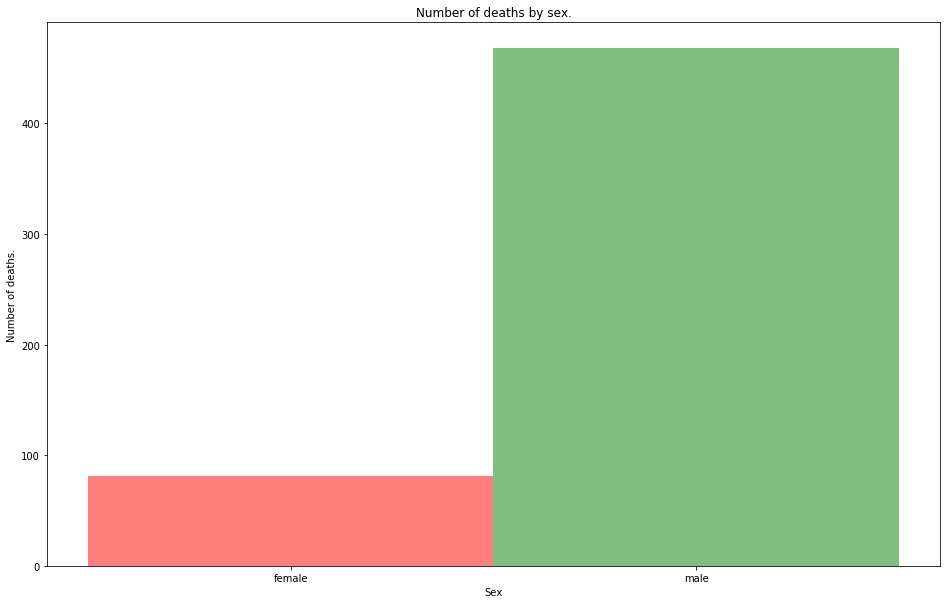

In [7]:
sex_died = train_df.loc[train_df["Survived"] == 0].groupby("Sex").count()["Survived"]
plt.figure(figsize=(16, 10))
plt.bar(sex_died.index, sex_died, color=["red", "green"], alpha=0.5, width=1)
plt.xlabel("Sex")
plt.title("Number of deaths by sex.")
plt.ylabel("Number of deaths.")

([<matplotlib.axis.XTick at 0x7f4546c24ac8>,
 <a list of 3 Text xticklabel objects>)

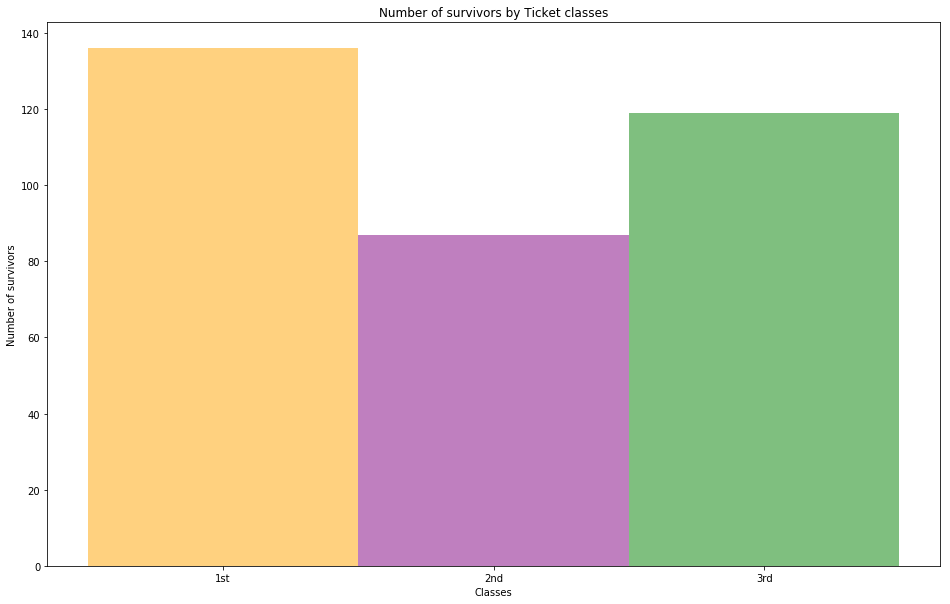

In [8]:
# Number of people who survived by class
survived_class = train_df[train_df["Survived"] == 1].groupby("Pclass").count()["Survived"]
plt.figure(figsize=(16,10))
plt.bar(survived_class.index, survived_class, color=["orange", "purple", "green"], alpha=0.5, width=1)
plt.xlabel("Classes")
plt.ylabel("Number of survivors")
plt.title("Number of survivors by Ticket classes")
plt.xticks(survived_class.index, ["1st", "2nd", "3rd"])

Text(0,0.5,'Number of survivors')

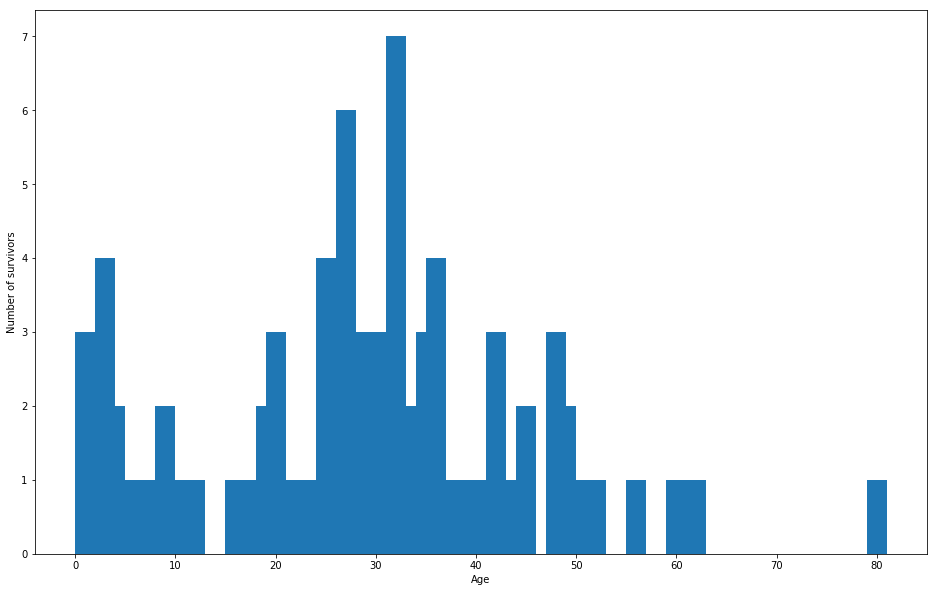

In [9]:
# Male survived grouped by age
train_df.dropna(subset=['Age'], how='all')
survived_male_by_age = train_df[train_df["Survived"] == 1].loc[train_df["Sex"] == "male"].loc[train_df["Age"] >= 1].sort_values(by=["Age"]).groupby("Age").count()["Survived"]


plt.figure(figsize=(16,10))
plt.bar(survived_male_by_age.index, survived_male_by_age, width=2)
plt.xlabel("Age")
plt.ylabel("Number of survivors")

In [38]:
def shape_dataframe(train_df):
    # Fill NaN values for -999
    dataframe = train_df.fillna(-999)

    #Drop Name, Ticket, PassengerId and Cabin as they are not representative 
    dataframe = dataframe.drop(labels=['Name', 'Ticket', "PassengerId", "Cabin"], axis=1)

    # One hot encoding on categorical data
    dataframe = pd.get_dummies(dataframe)
    
    
    
        
    # REmove Embarked_-999
    dataframe.drop(labels=["Embarked_-999"], axis=1, inplace=True)
    
    return dataframe
dataframe = shape_dataframe(train_df)

In [39]:
train_columns = list(dataframe.columns)
y = dataframe[train_columns.pop(0)].values
X = dataframe[train_columns]

In [40]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,-999.0,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [13]:
# Algorithms
# Decision Trees, 
# K nearest Neigborghs
# Support Vector Machines
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve

/home/edgar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/edgar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
DTclf = DecisionTreeClassifier(random_state=42)
KNNclf = KNeighborsClassifier()
RFclf = RandomForestClassifier(random_state=42)
LRClf = LogisticRegression(random_state=42)

In [15]:
algorithm_names = ["Decision Trees", "K Nearest Neighborgs", "Random forests", "Logistic Regression"]
clfs = [
    DTclf,
    KNNclf,
    RFclf,
    LRClf
]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

def run_all_algorithms(clfs, algorithm_names, X_train, X_test, y_train, y_test):
    for clf, clf_name in zip(clfs, algorithm_names):
        clf.fit(X_train, y_train)
        print("{}".format(clf_name))
        print("accuracy is {0:.2f}%".format(clf.score(X_test, y_test)*100))
        print("\n")

def accuracy_score_method(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    acc_socre = accuracy_score(y_test, y_predicted)
    prec_score = precision_score(y_test, y_predicted)
    roc_curve_value = roc_curve(y_test, y_predicted) 
    print("Confusion matrix %s", cm)
    print("accuracy score %s", acc_socre)
    print("precision score %s", prec_score)
    print("roc curve %s", roc_curve_value)
        
        
run_all_algorithms(clfs, algorithm_names, X_train, X_test, y_train, y_test) 

Decision Trees
accuracy is 77.09%


K Nearest Neighborgs
accuracy is 70.39%


Random forests
accuracy is 81.56%


Logistic Regression
accuracy is 77.09%




In [139]:
parameters  = {
    'n_estimators' : [10,60,100],
    'max_depth': [10,40,60,100]
}

In [141]:
rfclf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfclf, param_grid= parameters, cv=10)

In [142]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 60, 100], 'max_depth': [10, 40, 60, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [143]:
clf.score(X_test, y_test)

0.8379888268156425

In [144]:
rfclf_best = clf.best_estimator_
prediction = rfclf_best.predict(X_test)
accuracy_score_method(y_test, prediction)

Confusion matrix %s [[94 11]
 [18 56]]
accuracy score %s 0.8379888268156425
precision score %s 0.835820895522388
roc curve %s (array([0.       , 0.1047619, 1.       ]), array([0.        , 0.75675676, 1.        ]), array([2, 1, 0]))


In [147]:
# shape_dataframe(train_df)
# Fill NaN values for -999
dataframe = test_df.fillna(-999)

#Drop Name, Ticket, PassengerId and Cabin as they are not representative 
dataframe = dataframe.drop(labels=['Name', 'Ticket', "PassengerId", "Cabin"], axis=1)

# One hot encoding on categorical data
dataframe = pd.get_dummies(dataframe)
dataframe

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


In [152]:
last_prediction = rfclf_best.predict(dataframe)

In [161]:
dataframe["Survived"] = last_prediction
test_df = test_df.fillna(-999)
test_df["Survived"] = last_prediction
test_df[["PassengerId", "Survived"]].to_csv("titanic_prediction.csv", sep=",", index=False)

In [151]:
# np.savetxt("titanic_prediction.csv", last_prediction, delimiter=",")